In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

Trainingset:(17030, 28, 28, 1),Labels:(17030, 10)
Testing set:(3000, 28, 28, 1),Labels:(3000, 10)


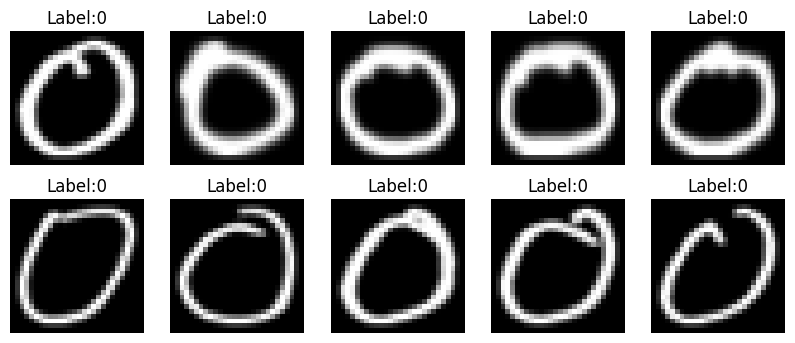

In [29]:
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset paths
train_dir = "/content/drive/MyDrive/AI and Machine Learning/Workshop4/DevanagariHandwrittenDigitDataset/Train/"
test_dir = "/content/drive/MyDrive/AI and Machine Learning/Workshop4/DevanagariHandwrittenDigitDataset/Test/"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize((img_width, img_height))
            img = np.array(img) / 255.0
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

 #Printdataset shape
print(f"Trainingset:{x_train.shape},Labels:{y_train.shape}")
print(f"Testing set:{x_test.shape},Labels:{y_test.shape}")
 #Visualizesomeimages
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')
    plt.title(f"Label:{np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [31]:
# Build the FCN model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
batch_size = 128
epochs = 100

callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]

history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2879 - loss: 2.0240 - val_accuracy: 0.0070 - val_loss: 6.1849
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7796 - loss: 0.7008 - val_accuracy: 0.2352 - val_loss: 6.5174
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9099 - loss: 0.3361 - val_accuracy: 0.2548 - val_loss: 6.8905
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9434 - loss: 0.2114 - val_accuracy: 0.2822 - val_loss: 6.9985
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9558 - loss: 0.1574 - val_accuracy: 0.2935 - val_loss: 7.2321


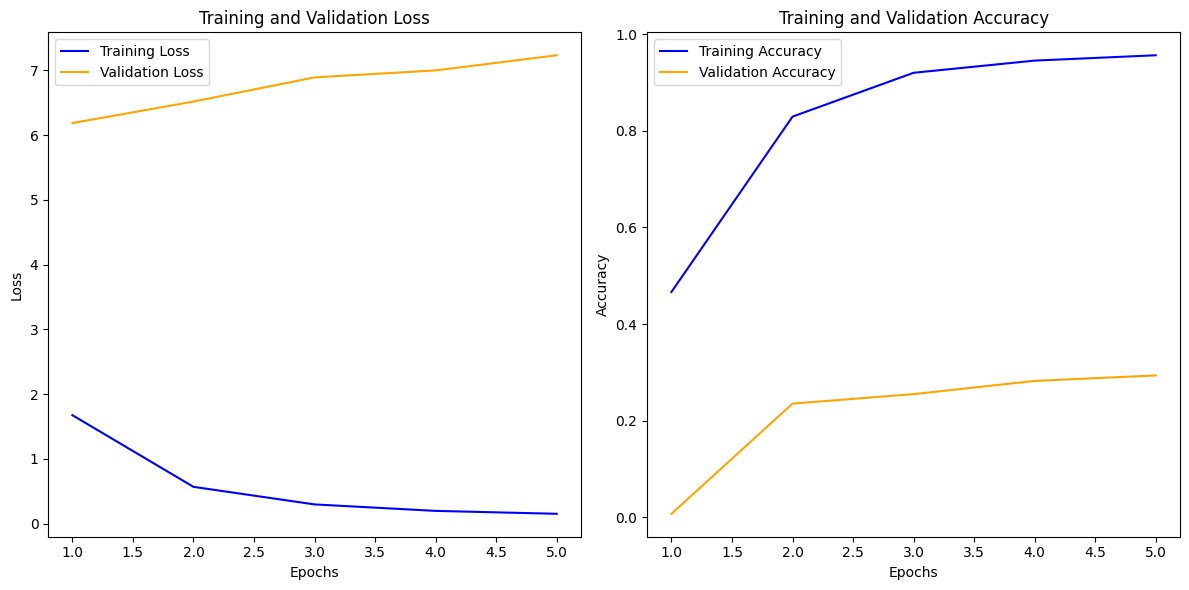

In [34]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.8523 - loss: 1.2166
Test accuracy: 0.8523
